# **Data Visualisation**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\hackathon\\hackathon1\\global-gdp-and-co2-emissions\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\hackathon\\hackathon1\\global-gdp-and-co2-emissions'

---

# Initial Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('dataset/processed/gdp_co2_by_country_processed.csv')
df.head()

,Country Name,Country Code,Year,Population,Pop Log,Pop Outliers,Pop Category,CO2,CO2 %,Per Capita CO2,...,CO2 Log,CO2 Outliers,Emissions Category,GDP USD,GDP USD Log,GDP %,GDP % Winsor,GDP Per Capita,GDP Category,CO2 Per GDP
0,Afghanistan,AFG,1961,9214082.0,16.036244,not outlier,1M-10M,0.491,0.000000,5.328800e-08,...,0.399447,False,Moderate,308.31827,5.734371,-10.119484,-10.119484,0.000033,Low GDP,0.001593
1,Afghanistan,AFG,1962,9404411.0,16.056689,not outlier,1M-10M,0.689,40.325866,7.326349e-08,...,0.524137,False,Moderate,308.31827,5.734371,-10.119484,-10.119484,0.000033,Low GDP,0.002235
2,Afghanistan,AFG,1963,9604491.0,16.077741,not outlier,1M-10M,0.707,2.612482,7.361140e-08,...,0.534737,False,Moderate,308.31827,5.734371,-10.119484,-10.119484,0.000032,Low GDP,0.002293
3,Afghanistan,AFG,1964,9814318.0,16.099353,not outlier,1M-10M,0.839,18.670438,8.548735e-08,...,0.609222,False,Moderate,308.31827,5.734371,-10.119484,-10.119484,0.000031,Low GDP,0.002721
4,Afghanistan,AFG,1965,10036003.0,16.121690,not outlier,10M-100M,1.007,20.023838,1.003388e-07,...,0.696641,False,Moderate,308.31827,5.734371,-10.119484,-10.119484,0.000031,Low GDP,0.003266


---

# Matplotlib Plots

Section 1 content

In [51]:
df_mean_and_sum = (df.groupby(['Country Name'])
        #    [['CO2', 'CO2 Log', 'GDP USD', 'GDP USD Log']]
           .agg(
               avg_co2=('CO2', 'mean'),
               avg_co2_log=('CO2 Log', 'mean'),
               avg_gdp=('GDP USD', 'mean'),
               avg_gdp_log=('GDP USD Log', 'mean'),
               co2_sum=('CO2', 'sum'),
               gdp_sum=('GDP USD', 'sum')
               )
           .reset_index()
            )
df_mean_and_sum.head()

,Country Name,avg_co2,avg_co2_log,avg_gdp,avg_gdp_log,co2_sum,gdp_sum
0,Afghanistan,3.723603,1.323287,364.624457,5.873310,234.587,2.297134e+04
1,Albania,4.561016,1.659190,2403.599181,7.694558,287.344,1.514267e+05
2,Algeria,82.607556,4.096142,3633.563496,8.170957,5204.276,2.289145e+05
3,Andorra,0.477559,0.389762,35599.246788,10.471607,16.237,1.210374e+06
4,Angola,11.280556,2.210686,2607.243517,7.851648,710.675,1.642563e+05


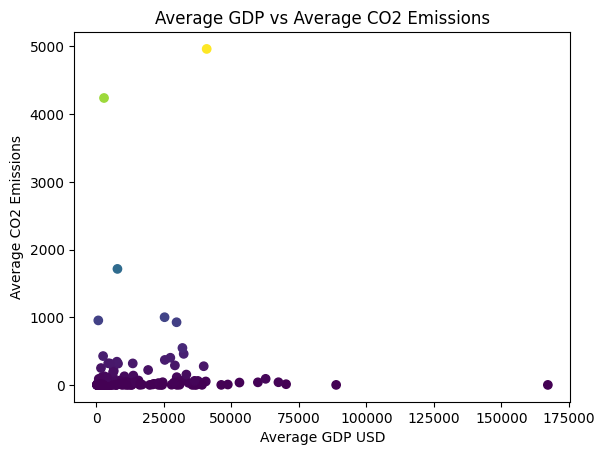

In [67]:
x, y = 'avg_gdp', 'avg_co2'
plt.scatter(data=df_mean_and_sum, x=x, y=y, c=y, cmap='viridis')
plt.xlabel('Average GDP USD')
plt.ylabel('Average CO2 Emissions')
plt.title('Average GDP vs Average CO2 Emissions')
plt.show()

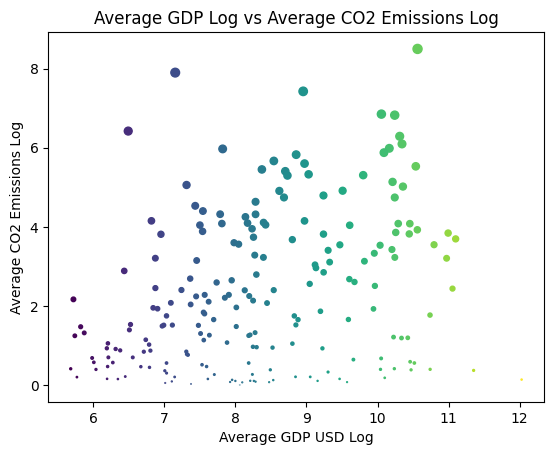

In [88]:
x, y = 'avg_gdp_log', 'avg_co2_log'
plt.scatter(data=df_mean_and_sum, x=x, y=y, c=x, s=df_mean_and_sum[y] * 5, cmap='viridis')
plt.xlabel('Average GDP USD Log')
plt.ylabel('Average CO2 Emissions Log')
plt.title('Average GDP Log vs Average CO2 Emissions Log')
plt.show()

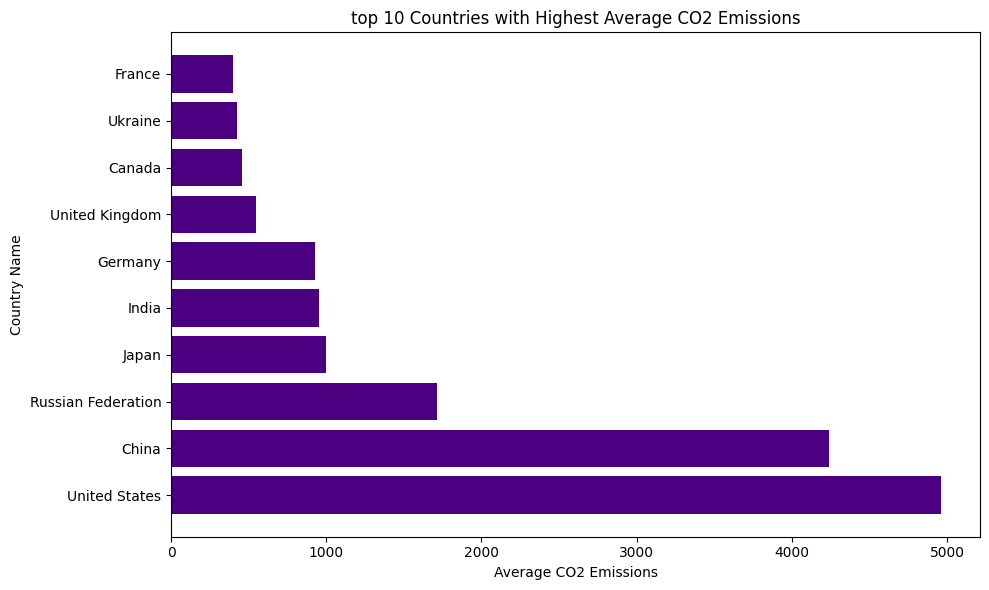

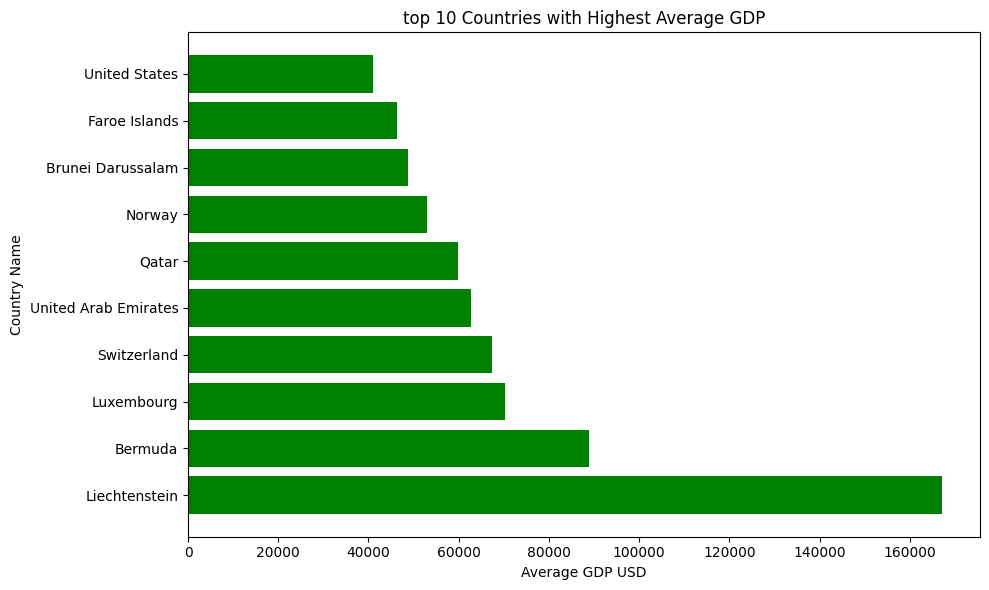

In [86]:
df_ms_sorted_co2 = df_mean_and_sum.sort_values(by='avg_co2', ascending=False)
top_10_countries_co2 = df_ms_sorted_co2.head(10)
plt.figure(figsize=(10, 6))
plt.barh(data=top_10_countries_co2, width='avg_co2', y='Country Name', color='indigo')
plt.ylabel('Country Name') 
plt.xlabel('Average CO2 Emissions')
plt.title('top 10 Countries with Highest Average CO2 Emissions')
plt.tight_layout()
plt.show()
df_ms_sorted_gdp = df_mean_and_sum.sort_values(by='avg_gdp', ascending=False)
top_10_countries_gdp = df_ms_sorted_gdp.head(10)
plt.figure(figsize=(10, 6))
plt.barh(data=top_10_countries_gdp, width='avg_gdp', y='Country Name', color='green')
plt.ylabel('Country Name')
plt.xlabel('Average GDP USD')
plt.title('top 10 Countries with Highest Average GDP')
plt.tight_layout()
plt.show()

---

# Seaborn Plots

Section 2 content

---

# Plotly Plots

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [6]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)